In [45]:
import os
import pandas
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
from nilearn import image, plotting
from mpl_toolkits.mplot3d import Axes3D

In [4]:
atlas_img.shape

(182, 218, 182)

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


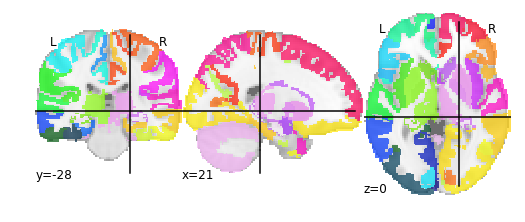

In [7]:
atlas_img = ni.load('../data/DKT_w_hipp_labels_TRANS_ERC.nii.gz')
plt.close()
plotting.plot_roi(atlas_img)
plt.show()
atlas = atlas_img.get_data()


In [28]:
# find hipp_labels
np.unique(atlas)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.], dtype=float32)

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


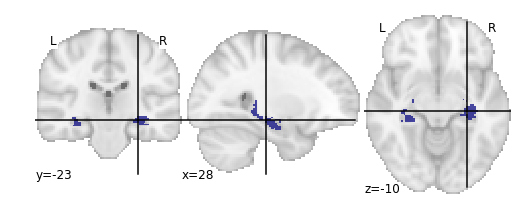

In [41]:
jnk = np.zeros_like(atlas)
jnk[atlas==84] = 1
plt.close()
plotting.plot_roi(ni.Nifti1Image(jnk,atlas_img.affine))
plt.show()



//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


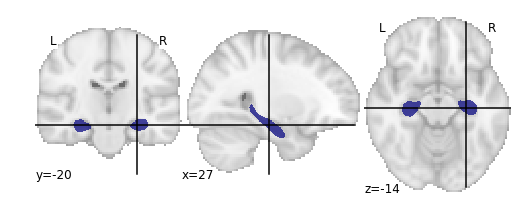

In [70]:
subcort = ni.load('/usr/local/fsl/data/atlases/HarvardOxford/HarvardOxford-sub-maxprob-thr50-1mm.nii.gz'
                 ).get_data()
hipp = np.zeros_like(subcort)
hipp[subcort==9] = 1
hipp[subcort==19] = 1
plt.close()
plotting.plot_roi(ni.Nifti1Image(hipp,atlas_img.affine))
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


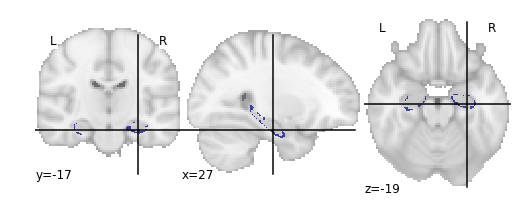

In [71]:
# make a hippocampus-voxels-not-labeled mask
mask = np.array(hipp,copy=True)
mask[atlas==84] = 0
mask[atlas==85] = 0
plt.close()
plotting.plot_roi(ni.Nifti1Image(mask,atlas_img.affine))
plt.show()

In [72]:
# get the labeled (s) and non-labeled (t) coordinates
final_hipp = np.array(atlas,copy=True)
final_hipp[hipp<1] = 0
s_coords = np.where(mask==1)
t_coords = np.where(final_hipp>83)

In [84]:
# replace 0 with the label of the closest labeled voxel
min_dist = pandas.DataFrame(index=range(len(coords[0])),
                           columns = ['x','y','z'])
for i in range(len(s_coords[0])):
    x,y,z = s_coords[0][i], s_coords[1][i], s_coords[2][i]
    closest = np.argmin([abs(x - t_coords[0][j]
          ) + abs(y - t_coords[1][j]
          ) + abs(z - t_coords[2][j]) for j in range(len(t_coords[0]))
              ])
    closest_coord = t_coords[0][closest], t_coords[1][closest], t_coords[2][closest]
    val = final_hipp[closest_coord]
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


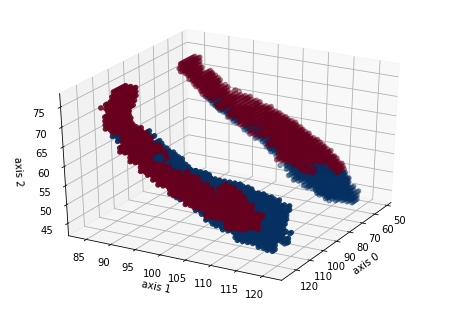

In [75]:
plt.close()
label_locations = t_coords
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(label_locations[0], label_locations[1], label_locations[2], c = final_hipp[label_locations],
          cmap='RdBu')
# To split into LR, we need to visualize where the LR split is, where front is
for angle in range(0, 30):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

ax.set_xlabel('axis 0')
ax.set_ylabel('axis 1')
ax.set_zlabel('axis 2')
plt.show()



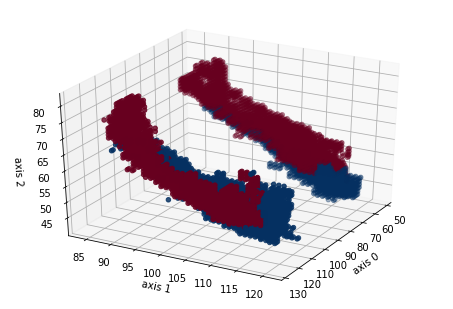

In [64]:
plt.close()
label_locations = np.where(atlas>83)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(label_locations[0], label_locations[1], label_locations[2], c = atlas[label_locations],
          cmap='RdBu')
# To split into LR, we need to visualize where the LR split is, where front is
for angle in range(0, 30):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

ax.set_xlabel('axis 0')
ax.set_ylabel('axis 1')
ax.set_zlabel('axis 2')
plt.show()




In [66]:
np.unique(t_coords[0])

array([ 52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125])

In [86]:
# split left and right hippocampus
bi_hipp = np.array(final_hipp, copy=True)
for i in range(len(t_coords[0])):
    x,y,z = t_coords[0][i], t_coords[1][i], t_coords[2][i]
    if x > 100:
        bi_hipp[x,y,z] = bi_hipp[x,y,z] + 2

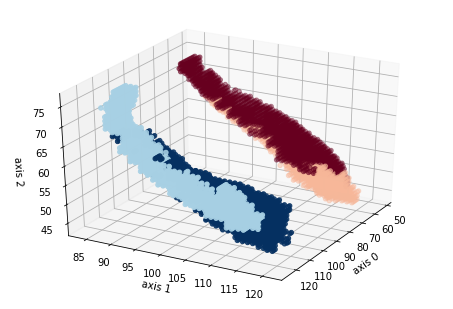

In [90]:
plt.close()
label_locations = t_coords
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(label_locations[0], label_locations[1], label_locations[2], c = bi_hipp[label_locations],
          cmap='RdBu')
# To split into LR, we need to visualize where the LR split is, where front is
for angle in range(0, 30):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

ax.set_xlabel('axis 0')
ax.set_ylabel('axis 1')
ax.set_zlabel('axis 2')
plt.show()


In [91]:
# make final parcellation
final_atlas = np.zeros_like(bi_hipp)
final_atlas[atlas==4] = 1
final_atlas[atlas==43] = 2
final_atlas[bi_hipp==84] = 3
final_atlas[bi_hipp==85] = 4
final_atlas[bi_hipp==86] = 5
final_atlas[bi_hipp==87] = 6


//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


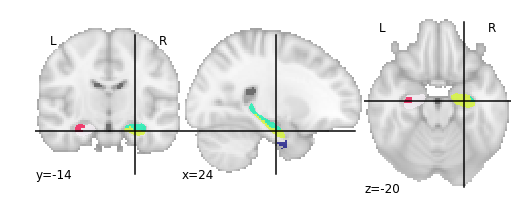

In [92]:
plt.close()
plotting.plot_roi(ni.Nifti1Image(final_atlas,atlas_img.affine))
plt.show()

In [94]:
np.unique(final_atlas)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.], dtype=float32)

In [93]:
# save
ni.Nifti1Image(final_atlas, atlas_img.affine).to_filename('../data/dilated_hipp_parcellation')

In [95]:
# with bigger ERC
dkt = ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').get_data()
final_atlas = np.zeros_like(bi_hipp)
final_atlas[dkt==4] = 1
final_atlas[dkt==43] = 2
final_atlas[bi_hipp==84] = 3
final_atlas[bi_hipp==85] = 4
final_atlas[bi_hipp==86] = 5
final_atlas[bi_hipp==87] = 6
# save
ni.Nifti1Image(final_atlas, atlas_img.affine).to_filename('../data/dilated_hipp_parcellation_FULL_EC')